# WeatherPy

## Giovanni's Analysis
--------------------
The closer you get to the equator the hotter it gets. Seeing 80 degrees Fahrenheit

It is also clearly noticed that humidity increases the closer you are to the equator (lattitude 0)

Not seeing a clear correlation between cloudiness and lattitude

Also not seeing a clear correlation between wind speed and latitude

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import csv
import os

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

#use time function for scatter plots
now = time.localtime(time.time())

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

#replace space in cities with +
cities = [city.replace(" ", "+") for city in cities]
len(cities)

618

In [3]:
#Testing time.sleep function. Using it to limit API calls per minute
#for x in range(11):
#    print(x)
#    time.sleep(1.1)
    
#print("Done looping")

In [4]:
#Testing different URLs
url = "http://api.openweathermap.org/data/2.5/weather?"
city = "London"
units = "imperial"

#query_url = url + "appid=" + api_key + "&q=" + city + "&units=" + units
query_url = f'{url}appid={api_key}&q={city}&units={units}'
city_weather = requests.get(query_url).json()
city_weather

{'coord': {'lon': -0.13, 'lat': 51.51},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 43.43,
  'pressure': 987,
  'humidity': 75,
  'temp_min': 41,
  'temp_max': 46.4},
 'visibility': 10000,
 'wind': {'speed': 13.87, 'deg': 250},
 'clouds': {'all': 75},
 'dt': 1551925643,
 'sys': {'type': 1,
  'id': 1414,
  'message': 0.0062,
  'country': 'GB',
  'sunrise': 1551940390,
  'sunset': 1551981053},
 'id': 2643743,
 'name': 'London',
 'cod': 200}

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Assign base URL to variable
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

#variables to be used for DataFrame
citi = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed  = []

print("Begin Data Retrieval")
print("--------------------------")
count = 1
set = 1
for city in cities:
    try:
        query_url = f"{url}appid={api_key}&q={city}&units={units}"
        city_weather = requests.get(query_url).json()
        print(f"Processing record {count} of set {set} | {city_weather['name']}")
        
        citi.append(city_weather['name'])
        cloudiness.append(city_weather['clouds']['all'])
        country.append(city_weather['sys']['country'])
        date.append(city_weather['dt'])
        humidity.append(city_weather['main']['humidity'])
        lat.append(city_weather['coord']['lat'])
        lng.append(city_weather['coord']['lon'])
        max_temp.append(city_weather['main']['temp_max'])
        wind_speed.append(city_weather['wind']['speed'])
        
        count += 1
        
        if count > 60:
              count = 1
              set += 1
              
        #No more than 60 API calls per minute      
        time.sleep(1.1)
              
    except KeyError:
        print("City not found. Skipping...")
        time.sleep(1.1)

print("--------------------------")              
print("Data Retrieval Complete")
print("--------------------------")

Begin Data Retrieval
--------------------------
Processing record 1 of set 1 | Constitucion
Processing record 2 of set 1 | Cabo San Lucas
Processing record 3 of set 1 | Port Alfred
Processing record 4 of set 1 | Ballina
Processing record 5 of set 1 | Copiapo
Processing record 6 of set 1 | Beloha
City not found. Skipping...
Processing record 7 of set 1 | Sandwick
Processing record 8 of set 1 | Albany
City not found. Skipping...
Processing record 9 of set 1 | Abeche
Processing record 10 of set 1 | Kavieng
Processing record 11 of set 1 | Tiksi
Processing record 12 of set 1 | Tuktoyaktuk
Processing record 13 of set 1 | Phan Thiet
Processing record 14 of set 1 | Nanortalik
Processing record 15 of set 1 | Sibut
Processing record 16 of set 1 | Ostrovnoy
Processing record 17 of set 1 | Atuona
Processing record 18 of set 1 | Whitehorse
Processing record 19 of set 1 | Otradnoye
Processing record 20 of set 1 | New Norfolk
Processing record 21 of set 1 | Bethel
Processing record 22 of set 1 | Peve

Processing record 59 of set 3 | Kutum
Processing record 60 of set 3 | Borogontsy
Processing record 1 of set 4 | Buala
Processing record 2 of set 4 | Abu Samrah
Processing record 3 of set 4 | Ozuluama
Processing record 4 of set 4 | Carballo
Processing record 5 of set 4 | Juneau
Processing record 6 of set 4 | Mullingar
Processing record 7 of set 4 | Airai
Processing record 8 of set 4 | Saint-Joseph
Processing record 9 of set 4 | Chokurdakh
Processing record 10 of set 4 | Husavik
Processing record 11 of set 4 | Clinton
Processing record 12 of set 4 | Jining
Processing record 13 of set 4 | Pathein
Processing record 14 of set 4 | Khasan
Processing record 15 of set 4 | Nenjiang
Processing record 16 of set 4 | Ambulu
Processing record 17 of set 4 | Pangnirtung
Processing record 18 of set 4 | Zhezkazgan
Processing record 19 of set 4 | Port Hueneme
City not found. Skipping...
Processing record 20 of set 4 | Palmer
Processing record 21 of set 4 | Douentza
Processing record 22 of set 4 | Flinders

Processing record 9 of set 7 | Kalaikunda
Processing record 10 of set 7 | Batagay
Processing record 11 of set 7 | Flin Flon
Processing record 12 of set 7 | Lagoa
Processing record 13 of set 7 | Richards Bay
Processing record 14 of set 7 | Namatanai
Processing record 15 of set 7 | Santa Fe
Processing record 16 of set 7 | Havelock
Processing record 17 of set 7 | Fortuna Foothills
Processing record 18 of set 7 | Birjand
Processing record 19 of set 7 | Warrington
City not found. Skipping...
Processing record 20 of set 7 | Sitniki
Processing record 21 of set 7 | Hambantota
Processing record 22 of set 7 | Loei
Processing record 23 of set 7 | Kosterevo
Processing record 24 of set 7 | Murovane
Processing record 25 of set 7 | Kisangani
City not found. Skipping...
Processing record 26 of set 7 | Port Shepstone
Processing record 27 of set 7 | Bathsheba
Processing record 28 of set 7 | Biu
Processing record 29 of set 7 | Tautira
Processing record 30 of set 7 | Oistins
Processing record 31 of set 7 

--------------------------
Data Retrieval Complete
--------------------------


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
dict = {"City": citi, "Cloudiness": cloudiness, "Country": country, "Date": date, "Humidity": humidity, 
       "Lat": lat, "Lng": lng, "Max Temp": max_temp, "Wind Speed": wind_speed}
df = pd.DataFrame(dict)
df.count()

City          555
Cloudiness    555
Country       555
Date          555
Humidity      555
Lat           555
Lng           555
Max Temp      555
Wind Speed    555
dtype: int64

In [7]:
#df.to_csv(r'output_data/cities.csv', index = None, header = True)
df.to_csv(output_data_file, header = True)
df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Constitucion,75,MX,1551923040,11,23.99,-104.67,71.60,8.05
1,Cabo San Lucas,40,MX,1551926127,73,22.89,-109.91,72.00,6.20
2,Port Alfred,36,ZA,1551926243,85,-33.59,26.89,70.00,5.99
3,Ballina,88,IE,1551926292,82,54.11,-9.15,44.01,23.00
4,Copiapo,36,CL,1551924000,72,-27.37,-70.33,64.40,4.70


In [8]:
#checking to see if we have a good random list of cities in different countries spanning the world
df_country = df.groupby('Country')
df_country = df_country.count().sort_values("City", ascending=False)
#df_country = df_country["City"]
df_country

,City,Cloudiness,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
Country,,,,,,,,
RU,65,65,65,65,65,65,65,65
US,46,46,46,46,46,46,46,46
AU,33,33,33,33,33,33,33,33
CA,32,32,32,32,32,32,32,32
BR,28,28,28,28,28,28,28,28
MX,17,17,17,17,17,17,17,17
CN,15,15,15,15,15,15,15,15
IN,14,14,14,14,14,14,14,14
ZA,12,12,12,12,12,12,12,12


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

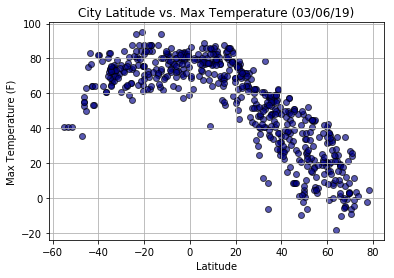

In [9]:
plt.scatter(lat, max_temp, marker="o", facecolors="darkblue", edgecolors="black", alpha=0.65)
plt.title(f"City Latitude vs. Max Temperature ({time.strftime('%m/%d/%y', now)})")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

plt.savefig("output_data/max_temp.png")
plt.show()

#### Latitude vs. Humidity Plot

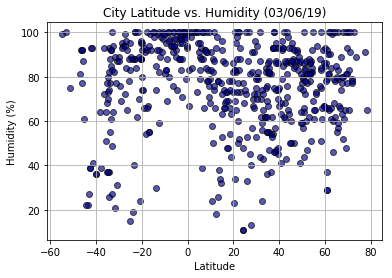

In [10]:
plt.scatter(lat, humidity, marker="o", facecolors="darkblue", edgecolors="black", alpha=0.65)
plt.title(f"City Latitude vs. Humidity ({time.strftime('%m/%d/%y', now)})")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

plt.savefig("output_data/humidity.png")
plt.show()

#### Latitude vs. Cloudiness Plot

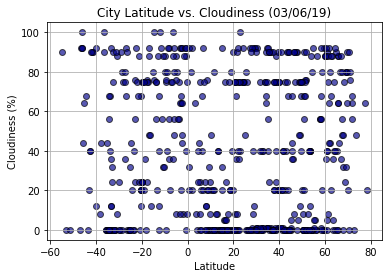

In [11]:
plt.scatter(lat, cloudiness, marker="o", facecolors="darkblue", edgecolors="black", alpha=0.65)
plt.title(f"City Latitude vs. Cloudiness ({time.strftime('%m/%d/%y', now)})")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

plt.savefig("output_data/cloudiness.png")
plt.show()

#### Latitude vs. Wind Speed Plot

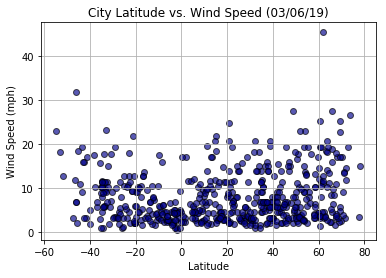

In [12]:
plt.scatter(lat, wind_speed, marker="o", facecolors="darkblue", edgecolors="black", alpha=0.65)
plt.title(f"City Latitude vs. Wind Speed ({time.strftime('%m/%d/%y', now)})")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid(True)

plt.savefig("output_data/windspeed.png")
plt.show()